In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)
X=torch.linspace(-5,5,100).unsqueeze(1)

In [3]:
X

tensor([[-5.0000],
        [-4.8990],
        [-4.7980],
        [-4.6970],
        [-4.5960],
        [-4.4949],
        [-4.3939],
        [-4.2929],
        [-4.1919],
        [-4.0909],
        [-3.9899],
        [-3.8889],
        [-3.7879],
        [-3.6869],
        [-3.5859],
        [-3.4848],
        [-3.3838],
        [-3.2828],
        [-3.1818],
        [-3.0808],
        [-2.9798],
        [-2.8788],
        [-2.7778],
        [-2.6768],
        [-2.5758],
        [-2.4747],
        [-2.3737],
        [-2.2727],
        [-2.1717],
        [-2.0707],
        [-1.9697],
        [-1.8687],
        [-1.7677],
        [-1.6667],
        [-1.5657],
        [-1.4646],
        [-1.3636],
        [-1.2626],
        [-1.1616],
        [-1.0606],
        [-0.9596],
        [-0.8586],
        [-0.7576],
        [-0.6566],
        [-0.5556],
        [-0.4545],
        [-0.3535],
        [-0.2525],
        [-0.1515],
        [-0.0505],
        [ 0.0505],
        [ 0.1515],
        [ 0.

In [4]:
y=3*X+torch.randn_like(X)*2

In [5]:
y

tensor([[-11.1462],
        [-11.7224],
        [-12.5925],
        [-18.3020],
        [-12.4310],
        [-15.9539],
        [-13.2680],
        [-16.0881],
        [-14.0800],
        [ -8.9753],
        [-12.7547],
        [-14.4739],
        [-12.8194],
        [-12.1795],
        [-12.2953],
        [ -8.9297],
        [ -6.8669],
        [-10.1677],
        [-10.5402],
        [ -8.3632],
        [-10.4557],
        [ -6.4797],
        [ -6.7317],
        [ -4.6691],
        [ -5.1690],
        [ -4.8314],
        [ -5.9003],
        [ -4.1487],
        [ -6.9784],
        [ -6.1286],
        [ -6.4122],
        [ -3.8863],
        [ -8.0724],
        [ -6.7425],
        [ -5.1437],
        [ -0.9592],
        [ -3.4531],
        [ -4.6369],
        [ -2.8734],
        [ -4.7310],
        [ -5.9939],
        [ -0.5845],
        [ -4.0323],
        [ -3.1720],
        [ -4.2150],
        [  2.8819],
        [ -3.5299],
        [ -1.7334],
        [ -2.2822],
        [ -1.4678],


In [6]:
y[::10]+=15

In [7]:
y

tensor([[  3.8538],
        [-11.7224],
        [-12.5925],
        [-18.3020],
        [-12.4310],
        [-15.9539],
        [-13.2680],
        [-16.0881],
        [-14.0800],
        [ -8.9753],
        [  2.2453],
        [-14.4739],
        [-12.8194],
        [-12.1795],
        [-12.2953],
        [ -8.9297],
        [ -6.8669],
        [-10.1677],
        [-10.5402],
        [ -8.3632],
        [  4.5443],
        [ -6.4797],
        [ -6.7317],
        [ -4.6691],
        [ -5.1690],
        [ -4.8314],
        [ -5.9003],
        [ -4.1487],
        [ -6.9784],
        [ -6.1286],
        [  8.5878],
        [ -3.8863],
        [ -8.0724],
        [ -6.7425],
        [ -5.1437],
        [ -0.9592],
        [ -3.4531],
        [ -4.6369],
        [ -2.8734],
        [ -4.7310],
        [  9.0061],
        [ -0.5845],
        [ -4.0323],
        [ -3.1720],
        [ -4.2150],
        [  2.8819],
        [ -3.5299],
        [ -1.7334],
        [ -2.2822],
        [ -1.4678],


In [8]:
class SimpleRegressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.net=nn.Sequential(
        nn.Linear(1,10),
        nn.ReLU(),
        nn.Linear(10,1)
    )
  def forward(self,x):
    return self.net(x)

In [9]:
def train_model(loss_fn,loss_name,color):
  model=SimpleRegressor()
  optimizer=optim.Adam(model.parameters(),lr=0.01)
  losses=[]
  for epoch in range(200):
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  plt.subplot(1,2,1)
  with torch.no_grad():
    y_fit=model(X)
    plt.plot(X,y_fit,label=f"{loss_name}",color=color)
  return losses

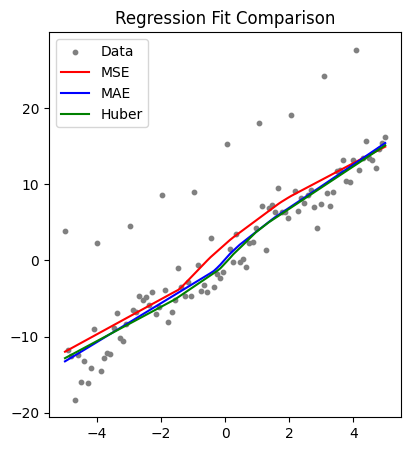

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X,y,s=10,label="Data",color="gray")
plt.title("Regression Fit Comparison")
mse_losses=train_model(nn.MSELoss(),"MSE","red")
mae_losses=train_model(nn.L1Loss(),"MAE","blue")
huber_losees=train_model(nn.HuberLoss(),"Huber","green")
plt.legend()

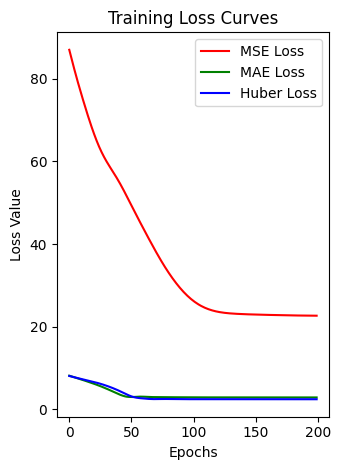

In [11]:
plt.subplot(1, 2, 2)
plt.plot(mse_losses, label="MSE Loss", color="red")
plt.plot(mae_losses, label="MAE Loss", color="green")
plt.plot(huber_losees, label="Huber Loss", color="blue")
plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.tight_layout()
plt.show()